Executive Summary

This project analyzes nearly five decades of US stock market behaviour using the “Daily Historical Stock Prices (1970–2018)” dataset. After extracting and cleaning over 20 million daily price records and merging them with company metadata, the data was segmented into decades to uncover long-term market trends. The exploratory analysis reveals three major findings:

1.  Stock prices have risen substantially over time, with average close prices growing from around $12 in the 1970s to over $120 in the 2000s, before stabilizing at a lower but still elevated range in the 2010s.
2.   Trading activity increased dramatically, as mean daily volume more than doubled between the 1970s and 2000s, reflecting greater investor participation, electronic trading, and structural market changes.
3.   Market volatility intensified in later decades, especially the 1990s–2000s, where wider price ranges, more outliers, and strong monthly fluctuations indicate more turbulent and speculative market periods.

Visualizations (monthly trends, histograms, and box plots) support these findings and highlight key anomalies such as the mid-1990s surge, the early-2000s dot-com spike, and strong 2013–2014 movements. The report concludes with hypotheses linking these behaviours to technological advancements, macroeconomic cycles, sector shifts, and regulatory changes.

This decade-level analysis provides a clear understanding of how structural and economic forces shaped US stock market dynamics from 1970 to 2018 and forms a solid foundation for advanced modelling or sector-specific investigations.






# Technical Report — Daily Historical Stock Prices (1970–2018)


Introduction

The objective of this project is to explore long-term patterns in US equity markets using daily historical stock prices from 1970 to 2018. The focus is on:

Cleaning and preparing two related datasets: one containing stock metadata and the other containing daily price and volume information.

Segmenting the data by decade to enable comparative analysis across market eras.

Performing exploratory data analysis (EDA) on prices and trading volumes, both overall and over time.

Identifying trends, anomalies, and potential drivers of changes in stock price behaviour.

This work simulates a typical data-analytics workflow in finance: ingesting large historical datasets, preparing them for analysis, and using summary statistics and visualizations to generate hypotheses.

Data Description and Collection

Two CSV files were provided in a compressed archive:

historical_stocks.csv

Contains static information at the stock level.

Key columns:

ticker – stock symbol

exchange – exchange where the stock is listed (e.g., NASDAQ)

name – company name

sector – broad sector classification

industry – more granular industry description

Shape after loading: 6,460 rows × 5 columns.

historical_stock_prices.csv

Contains daily price and volume observations for multiple tickers from 1970–2018.

Key columns:

ticker

open, high, low, close – daily OHLC prices

adj_close – adjusted close price

volume – daily trading volume

date – trading date

Shape after loading: 20,973,889 rows × 8 columns.

The files were uploaded to Google Colab, extracted from the ZIP archive into a stock_data directory, and read into Pandas DataFrames stocks_df and prices_df.

Data Cleaning and Pre-processing

Handling Missing Values and Data Types

Data quality checks showed no missing values in the key columns (ticker, prices, volume, date). Nevertheless, the following steps were applied to ensure robustness:

All numeric price and volume columns (open, high, low, close, volume, adj_close) were explicitly converted to numeric using pd.to_numeric(..., errors='coerce').

Any potential NaN values created in those numeric columns were handled using forward fill followed by backward fill:
prices_df[numeric_cols] = prices_df[numeric_cols].ffill().bfill()
Remaining rows with missing numeric values (if any) were dropped:
prices_df = prices_df.dropna(subset=numeric_cols)
This strategy preserves continuity in long time series while eliminating rows that still cannot be repaired. It is appropriate for high-frequency financial data where neighbouring days often provide a reasonable approximation.

Duplicate Removal

Potential duplicates were checked in both DataFrames:

stocks_df.duplicated().sum()
prices_df.duplicated().sum()

The result showed 0 duplicates in both datasets, so no further action was necessary.

Date Conversion and Indexing

The date column in prices_df was converted to a proper datetime type:
Setting date as the index simplifies time-based resampling and decade segmentation.

Creating Year and Decade Variables

To enable decade-level aggregation, two derived columns were created:
This maps, for example, 1973 → 1970, 1998 → 1990, and so on.

Merging Price Data with Stock Metadata

To enrich daily prices with company information (sector and industry), prices_df was merged with stocks_df on the ticker key:
The resulting merged_df has 20,973,889 rows × 13 columns, including both price/volume fields and fundamental attributes (exchange, sector, industry).

A dictionary of decade-specific DataFrames was then created for convenience:

Exploratory Data Analysis by Decade
 Summary Statistics by Decade

For each decade, mean, median, and standard deviation were computed for the main numeric variables:

open, high, low, close, volume

Example (aggregated on merged_df):

Key patterns from the summary table:

Rising price level over time:

Mean close price increased from roughly $12.5 in the 1970s to about $45 in the 1990s and peaked around $122 in the 2000s.

In the 2010s, the mean close price decreased to about $65, still well above the earlier decades.

Increasing volatility:

Standard deviations of daily prices (open/high/low/close) are relatively small in the 1970s and 1980s, then increase dramatically in the 1990s and especially the 2000s.

This indicates greater fluctuations in stock prices, consistent with more turbulent market conditions in later decades.

Rising trading volumes:

Mean daily volume rises from roughly 0.7–0.8 million shares in the 1970s–1980s to around 1.38 million in the 2000s.

The 2010s show a slight decline from the 2000s peak but remain above earlier decades, suggesting sustained higher market activity compared with the 1970s–1990s.

A simpler summary focused on means (mean_by_decade) clearly shows this upward trend in both price level and trading volume across decades.

Time Series of Average Monthly Close Prices

For each decade, daily close prices were resampled to monthly frequency and averaged:

Plots of average monthly close price for each decade reveal:

1970s: Prices fluctuate in a relatively narrow band (roughly $10–$18). There are gentle cycles but no extreme spikes, reflecting a relatively stable, lower-priced market.

1980s: Levels are slightly higher (around $10–$25) with visible spikes mid-decade, indicating occasional volatility but still moderate compared to later decades.

1990s: A clear upward trend with a pronounced peak around the mid-1990s (average monthly closes approaching $150), followed by fluctuations but generally higher than earlier decades.

2000s: The most volatile decade. There is a very sharp spike at the beginning of the decade (average monthly close above $400) consistent with the tail end of the dot-com boom, followed by large swings throughout the decade.

2010s: Price levels moderate compared with the 2000s peak, typically between $40–$80, with a noticeable spike around 2013–2014. Overall, the 2010s show a more stable range than the 2000s, but still higher than the 1970s–1980s.

These time-series plots highlight both the secular growth in price levels over time and the higher volatility in the 1990s and 2000s.

Volume Distributions

Histograms of daily trading volume for each decade show:

Strong right-skewness in every decade: most days have relatively modest volume, but there are occasional days with extremely high volume.

The bulk of the distribution shifts to the right over time, especially from the 1990s to the 2000s, confirming the increase in typical trading activity.

A few extreme outliers with very large volumes (up to the order of 10⁹ shares) appear in later decades, suggesting episodes of intense trading possibly related to market stress or major corporate events.

Box Plots of High and Low Prices

Box plots comparing daily high and low prices for each decade show:

The spread between high and low widens significantly from the 1970s to the 2000s, indicating larger intraday price movements and higher volatility in later decades.

The presence of numerous outliers, especially in the 1990s, 2000s, and 2010s, reflects days with unusually large price swings or very high prices compared with the decade’s typical range.

Median high and low values shift upward over time, consistent with the upward drift in overall price levels.

Comparative Analysis Across Decades

Bringing the previous analyses together:

Price Level Trend

There is a clear long-run increase in average stock prices from the 1970s to the 2000s.

The 2000s show the highest mean close price, driven partly by a major spike at the start of the decade.

In the 2010s, mean prices decline from the 2000 peak but remain substantially above earlier decades.

Trading Volume Trend

Mean daily volume rises decade by decade, from ~0.7M in the 1970s to ~1.38M in the 2000s.

The 2010s show a slight reduction from the 2000s peak but remain more active than the 1970s–1990s, reflecting structurally higher market participation.

Volatility and Outliers

Standard deviations of prices and the width of the box plots show that volatility is lowest in the 1970s and highest in the 1990s–2000s.

Time series plots reveal pronounced spikes in the mid-1990s, early 2000s, and mid-2010s, which likely correspond to major market events.

Volume and price outliers become more frequent in later decades.

Decade Characterisation (qualitative)

1970s–1980s: lower price levels, moderate volume, relatively stable behaviour.

1990s: rising prices and volatility, with a large mid-decade run-up.

2000s: highest prices and volumes, with extreme spikes, reflecting a very turbulent period.

2010s: moderate but elevated price levels, high but slightly lower volume than the 2000s, and sporadic spikes.

Although sector-level analysis was not explored in detail in this project, the merged dataset now supports future work that could compare, for example, Technology vs. Financials or Energy across decades.

Key Findings

From the decade-level EDA, the main findings are:

Secular Growth in Stock Prices
Average close prices trend upward from the 1970s to the 2000s, reflecting long-term growth in equity valuations. The 2010s show a partial correction from the 2000s spike but still higher prices than early decades.

Structural Increase in Market Activity
Mean daily trading volume increases substantially across decades, peaking in the 2000s and remaining elevated afterward. This suggests increased investor participation, more listed companies, and the rise of electronic/algorithmic trading.

Higher Volatility in Later Decades
Standard deviations, time-series spikes and wider box plots indicate that price volatility is significantly higher in the 1990s and 2000s compared with the 1970s–1980s.

Heavy-Tailed Distributions
Both price and volume distributions display heavy tails and many outliers, especially in later decades, implying that large, infrequent shocks play an important role in market dynamics.

Initial Hypotheses and Potential Drivers

Based on the patterns observed, several hypotheses can be proposed:

Macroeconomic and Crisis Effects

Spikes in prices and volumes in the mid-1990s and early 2000s may be related to events such as the dot-com boom and bust, while late-2000s volatility likely reflects the global financial crisis.

Economic expansions and recessions likely contribute to the decade-to-decade differences in mean prices and volatility.

Technological and Structural Market Changes

The sustained growth in trading volume may be driven by electronic trading platforms, online brokerage access, and high-frequency trading, which became prominent from the 1990s onward.

Lower transaction costs and greater access to markets might explain higher participation and more frequent trading.

Sectoral Shifts

Growth in technology and financial sectors relative to traditional industries may elevate overall price levels and volatility, although this was not yet analysed explicitly. Future work could group stocks by sector and compare their decade-level behaviour.

Regulatory and Policy Influences

Changes in regulations (e.g., decimalisation of stock prices, changes in margin requirements, or disclosure rules) may also influence trading behaviour and volatility across decades.

These hypotheses are plausible explanations for the observed patterns and could be tested in further studies using event annotations or sector-specific analyses.

Limitations and Future Work

The analysis focuses mainly on aggregate behaviour across all stocks. It does not distinguish between sectors, market capitalisations, or individual companies.

No adjustment was made for inflation, which means that part of the rise in prices over decades reflects changes in the value of money rather than pure real returns.

The EDA is descriptive and does not involve formal statistical tests or predictive modelling.

Future work could include:

Sector-level and exchange-level comparisons (e.g., Technology vs. Finance; NASDAQ vs. NYSE).

Analysis of returns (percentage changes) rather than absolute prices, including volatility clustering and risk measures.

Event studies around major crises or regulatory changes.

Building forecasting models (e.g., ARIMA, GARCH, or machine learning models) using the processed dataset.

Conclusion

This project demonstrates a full workflow for analysing a large historical financial dataset:

Data collection and cleaning of both stock metadata and daily price/volume records.

Transformation and merging to create a unified DataFrame with time-based features (year, decade) and sector information.

Decade-level exploratory data analysis using summary statistics, histograms, box plots, and time-series charts.

Comparative analysis that highlights how stock price levels, trading volumes, and volatility have evolved over almost five decades.

Overall, the results suggest that equity markets have experienced long-term growth in price levels and trading activity, accompanied by higher volatility and more pronounced extreme events in later decades. The prepared dataset and code provide a solid foundation for deeper modelling and sector-specific analysis in future work.

Upload & unzip (colab zip)


In [1]:
from google.colab import files
uploaded = files.upload()   # upload the ZIP file from your computer


Saving Daily Historical Stock Prices (1970 - 2018).zip to Daily Historical Stock Prices (1970 - 2018).zip


In [2]:
import zipfile
import io

zip_file_name = [name for name in uploaded.keys() if name.endswith('.zip')][0]
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as z:
    z.extractall('stock_data')


Preprocessing

In [13]:
# ===== MASTER PREPROCESSING CELL =====
# Loads data, cleans it, creates year/decade, and merges with stock info.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. File paths
base_path = 'stock_data'
stocks_path = os.path.join(base_path, 'historical_stocks.csv')
prices_path = os.path.join(base_path, 'historical_stock_prices.csv')

# 2. Load CSVs
stocks_df = pd.read_csv(stocks_path)
prices_df = pd.read_csv(prices_path)

# 3. Handle numeric columns in prices_df
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'adj_close']

for col in numeric_cols:
    prices_df[col] = pd.to_numeric(prices_df[col], errors='coerce')

# Forward-fill then back-fill numeric missing values
prices_df[numeric_cols] = prices_df[numeric_cols].ffill().bfill()

# If any still NaN, drop those rows
prices_df = prices_df.dropna(subset=numeric_cols)

# 4. Convert date column and set as index
prices_df['date'] = pd.to_datetime(prices_df['date'])
prices_df = prices_df.sort_values('date').set_index('date')

# 5. Add year and decade columns
prices_df['year'] = prices_df.index.year
prices_df['decade'] = (prices_df['year'] // 10) * 10

# 6. Merge with stocks_df to bring in exchange / sector / industry
merged_df = (
    prices_df
        .reset_index()                      # bring date as a column
        .merge(stocks_df, on='ticker', how='left')
        .set_index('date')                  # put date back as index
)

# 7. Create separate DataFrames per decade
decades = sorted(merged_df['decade'].unique())
decade_dfs = {d: merged_df[merged_df['decade'] == d].copy() for d in decades}

print("stocks_df shape:", stocks_df.shape)
print("prices_df shape:", prices_df.shape)
print("merged_df shape:", merged_df.shape)
print("Decades available:", decades)



stocks_df shape: (6460, 5)
prices_df shape: (20973889, 9)
merged_df shape: (20973889, 13)
Decades available: [np.int64(1970), np.int64(1980), np.int64(1990), np.int64(2000), np.int64(2010)]


In [14]:
# SUMMARY STATS BY DECADE (mean, median, std for prices & volume)

numeric_cols = ['open', 'high', 'low', 'close', 'volume']

summary_decade = (
    merged_df
      .groupby('decade')[numeric_cols]
      .agg(['mean', 'median', 'std'])
)

summary_decade


open                                high             \
              mean     median          std        mean     median   
decade                                                              
1970     12.491493   2.791667    46.981142   12.640192   2.840909   
1980     16.814261   5.000000   573.048093   17.095074   5.083333   
1990     45.291459  10.583831  1391.110191   46.871896  10.750000   
2000    122.295850  16.580000  4485.636333  125.646271  16.866667   
2010     65.261101  20.010000  1820.181589   66.723946  20.285000   

                            low                               close  \
                std        mean     median          std        mean   
decade                                                                
1970      47.481931   12.366931   2.765625    46.513085   12.491549   
1980     582.814179   16.561523   4.958333   562.257404   16.824845   
1990    1464.629619   43.814977  10.437500  1329.334616   45.303495   
2000    4703.968766  119.170676  16.299999  4318.821828  122.440812   
2010    1941.571402   63.917347  19.750000  1763.144292   65.278332   

                                      volume                          
           median          std          mean    median           std  
decade                                                                
1970     2.791667    46.985360  7.248936e+05  187200.0  1.377366e+06  
1980     5.000000   575.029287  8.375234e+05   64600.0  4.510088e+06  
1990    10.593750  1391.576526  8.635272e+05   62200.0  5.834012e+06  
2000    16.584999  4509.781698  1.383562e+06  133400.0  9.230143e+06  
2010    20.010000  1850.127729  1.320505e+06  165400.0  1.770789e+07

In [15]:
summary_decade.style.format("{:,.2f}")


Time Series: Average Monthly close per Decade

/tmp/ipython-input-1801799058.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_close = df_dec['close'].resample('M').mean()


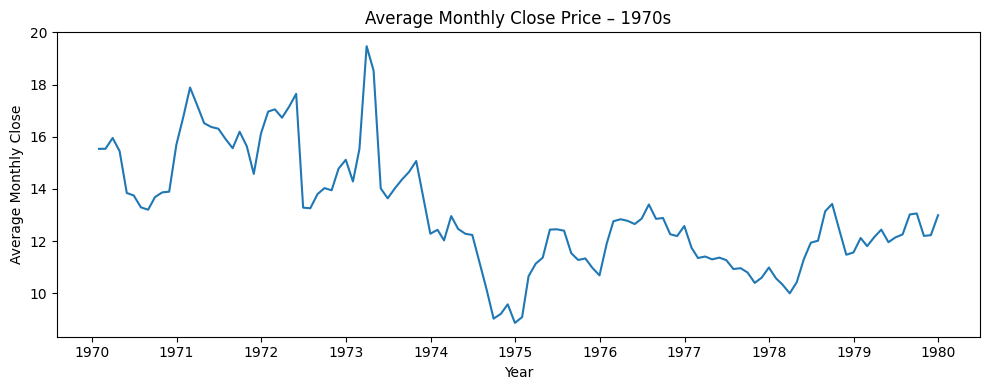

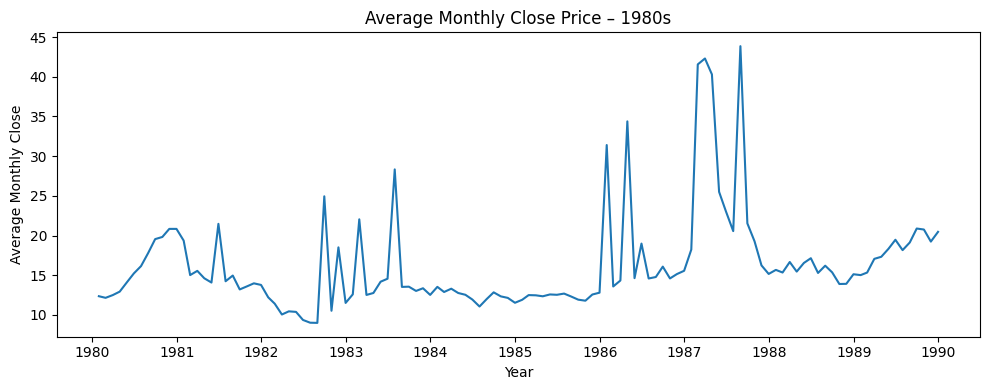

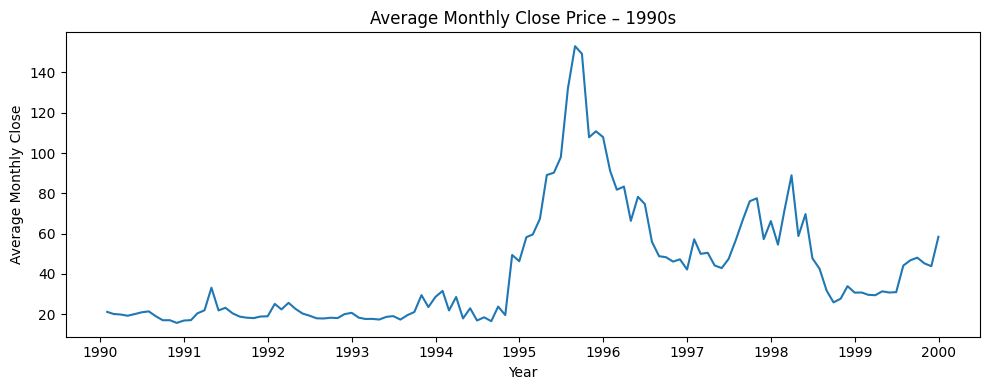

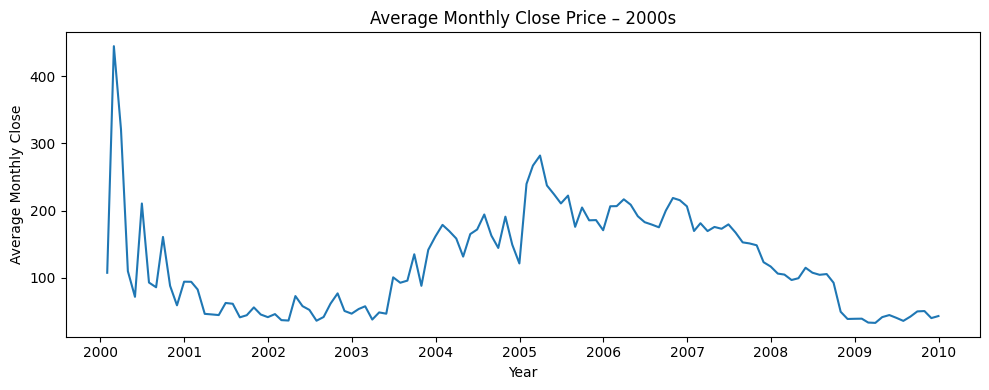

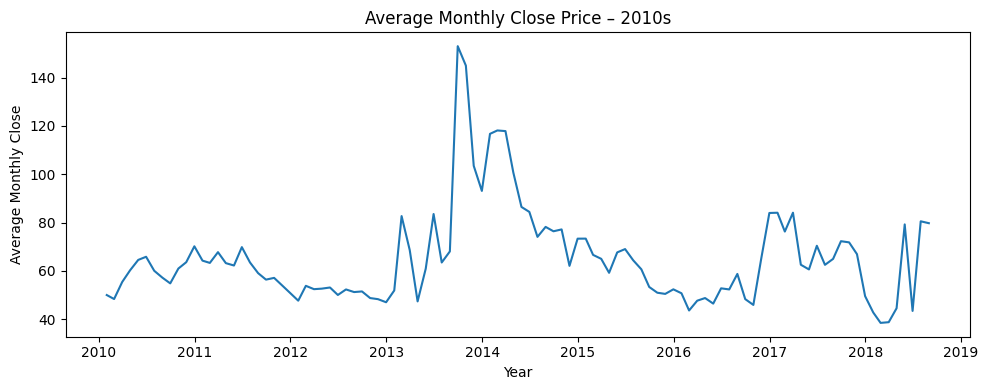

In [16]:
# TIME SERIES PLOTS – AVERAGE MONTHLY CLOSE PRICE BY DECADE

for d, df_dec in decade_dfs.items():
    monthly_avg_close = df_dec['close'].resample('M').mean()

    plt.figure(figsize=(10, 4))
    plt.plot(monthly_avg_close.index, monthly_avg_close.values)
    plt.title(f'Average Monthly Close Price – {d}s')
    plt.xlabel('Year')
    plt.ylabel('Average Monthly Close')
    plt.tight_layout()
    plt.show()


Volume: Histograms by Decade

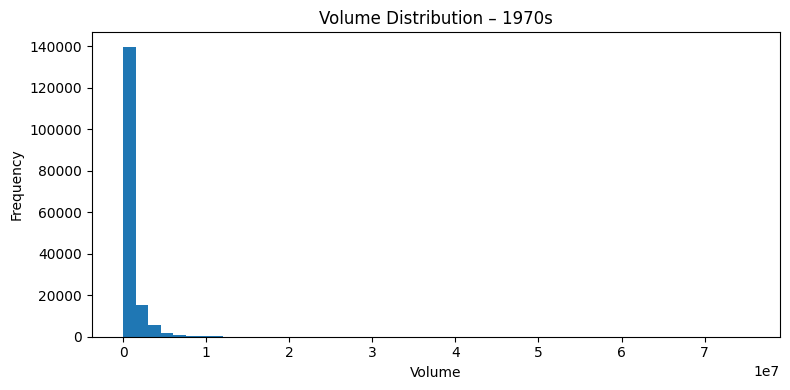

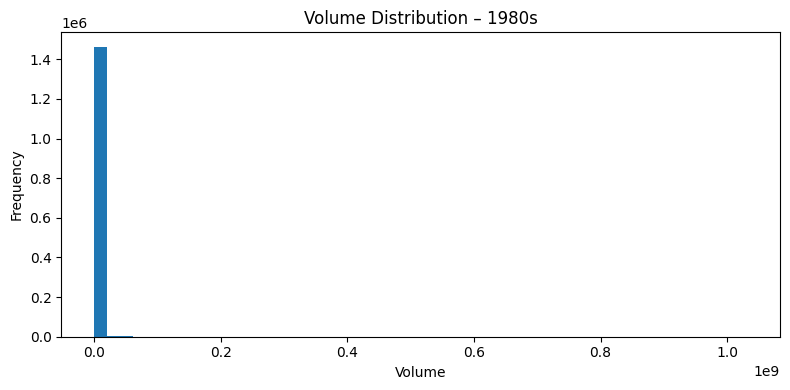

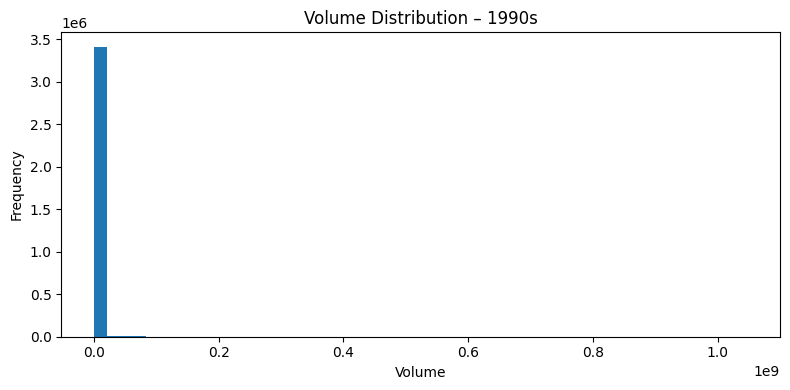

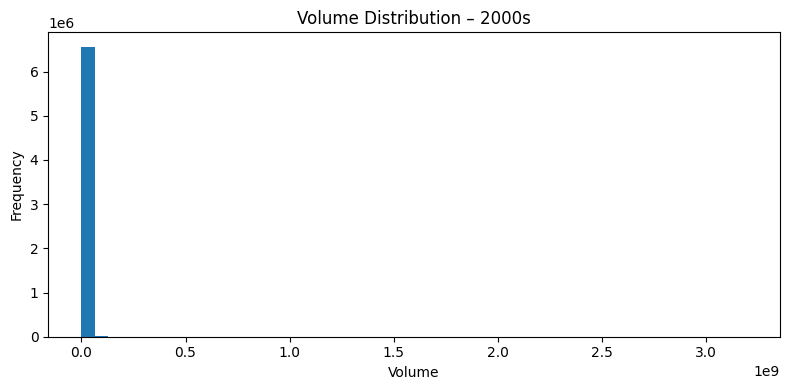

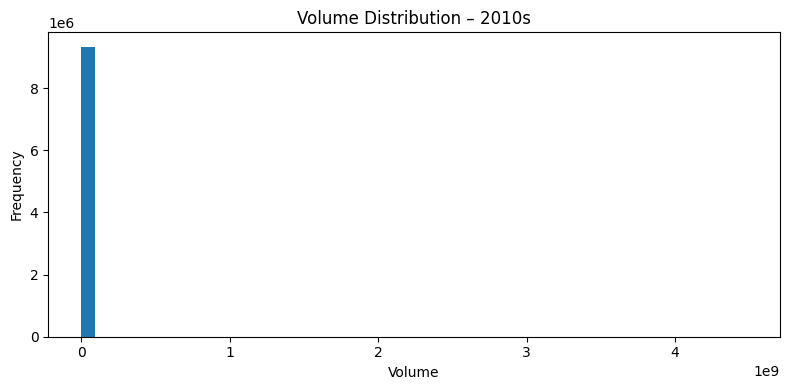

In [17]:
# HISTOGRAMS OF VOLUME BY DECADE

for d, df_dec in decade_dfs.items():
    plt.figure(figsize=(8, 4))
    plt.hist(df_dec['volume'].dropna(), bins=50)
    plt.title(f'Volume Distribution – {d}s')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Skewed Volume

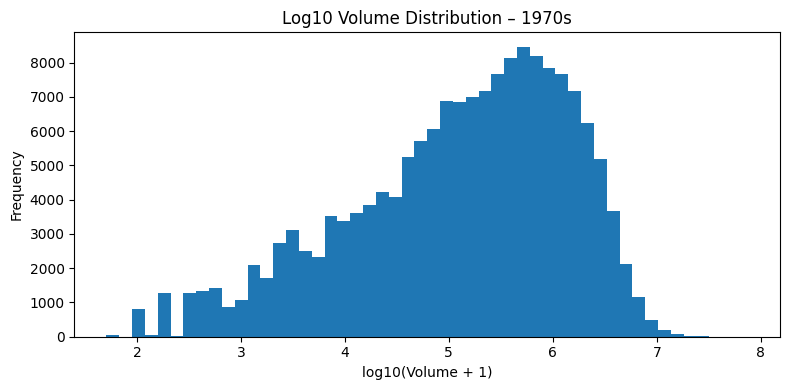

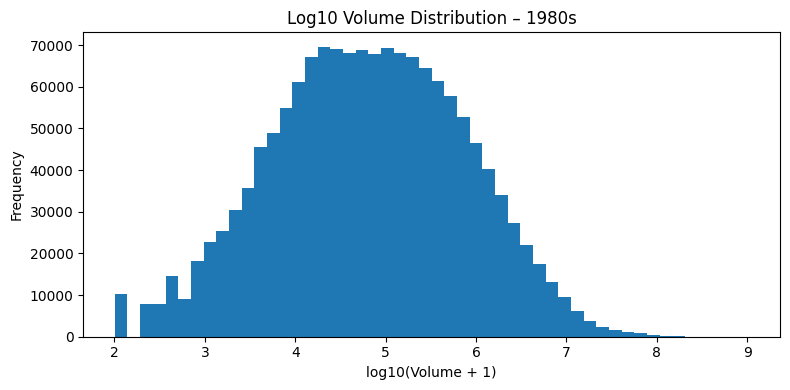

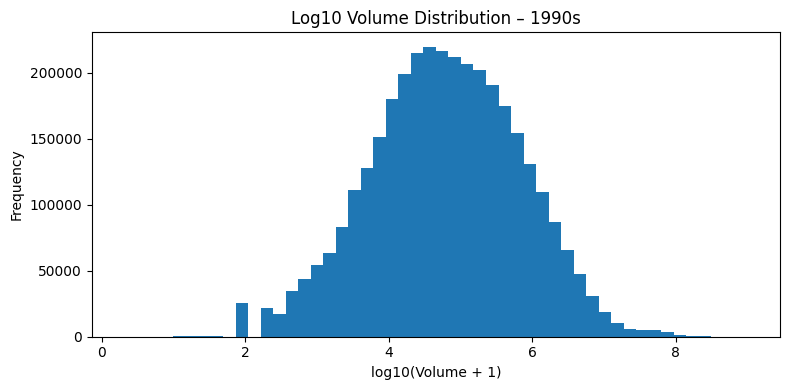

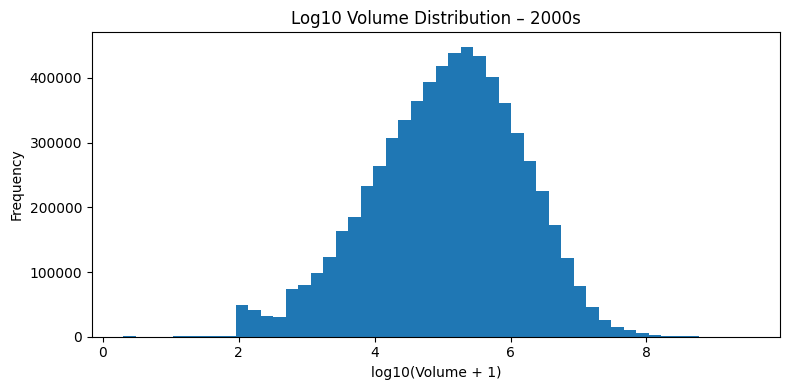

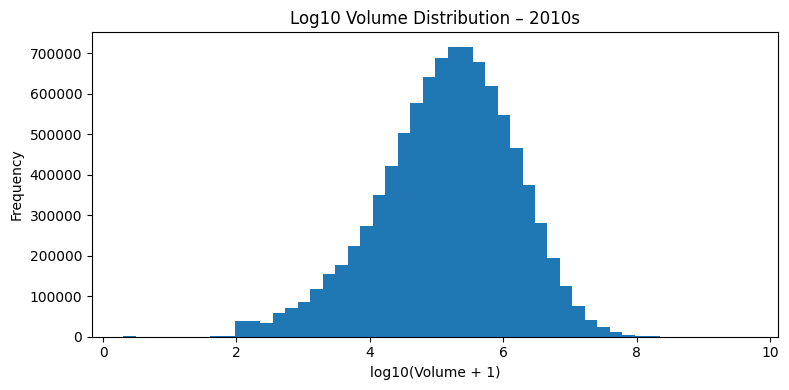

In [19]:


for d, df_dec in decade_dfs.items():
    plt.figure(figsize=(8, 4))
    plt.hist(np.log10(df_dec['volume'].dropna() + 1), bins=50)
    plt.title(f'Log10 Volume Distribution – {d}s')
    plt.xlabel('log10(Volume + 1)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Box Plots for high & low by Decade

/tmp/ipython-input-2194288614.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


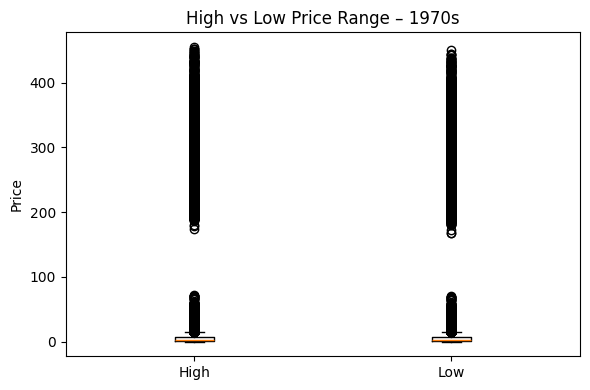

/tmp/ipython-input-2194288614.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


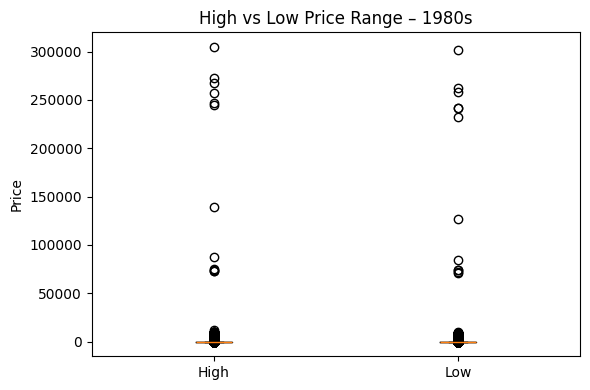

/tmp/ipython-input-2194288614.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


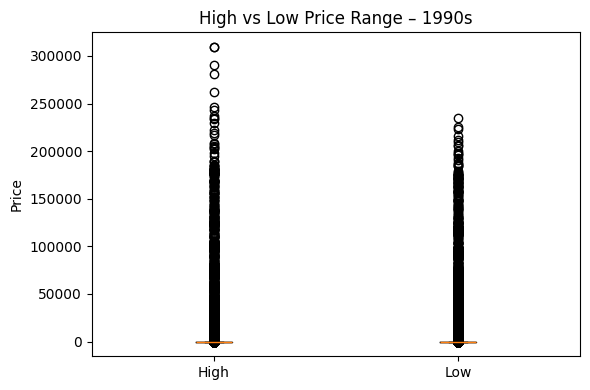

/tmp/ipython-input-2194288614.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


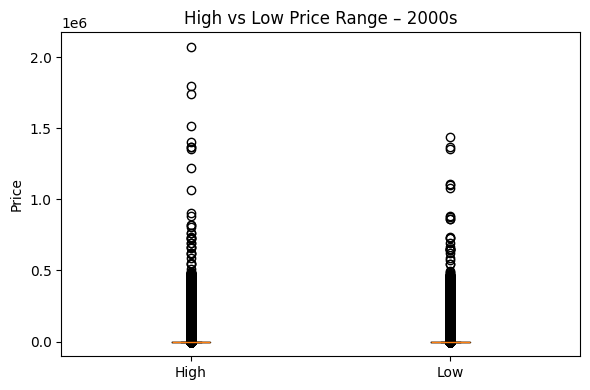

/tmp/ipython-input-2194288614.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


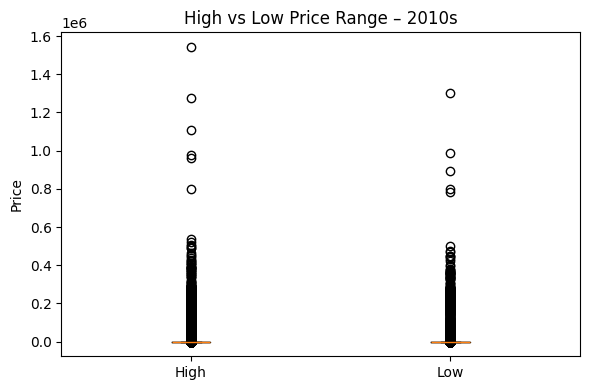

In [20]:
# BOX PLOTS FOR HIGH AND LOW PRICES BY DECADE

for d, df_dec in decade_dfs.items():
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        [df_dec['high'].dropna(), df_dec['low'].dropna()],
        labels=['High', 'Low']
    )
    plt.title(f'High vs Low Price Range – {d}s')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()


In [21]:


mean_by_decade = (
    merged_df
      .groupby('decade')[['open', 'high', 'low', 'close', 'volume']]
      .mean()
)

mean_by_decade


,open,high,low,close,volume
decade,,,,,
1970,12.491493,12.640192,12.366931,12.491549,7.248936e+05
1980,16.814261,17.095074,16.561523,16.824845,8.375234e+05
1990,45.291459,46.871896,43.814977,45.303495,8.635272e+05
2000,122.295850,125.646271,119.170676,122.440812,1.383562e+06
2010,65.261101,66.723946,63.917347,65.278332,1.320505e+06


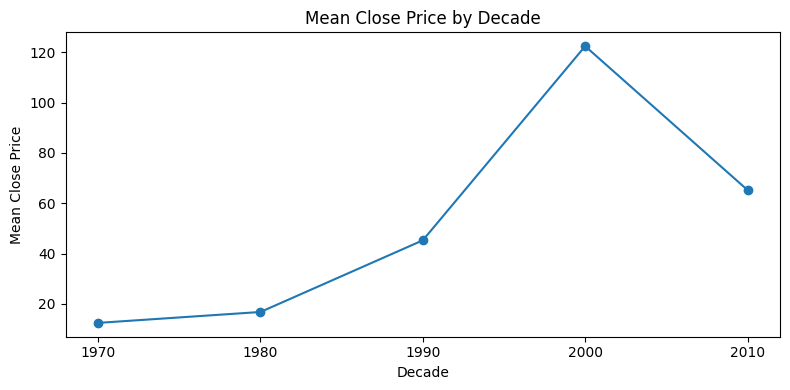

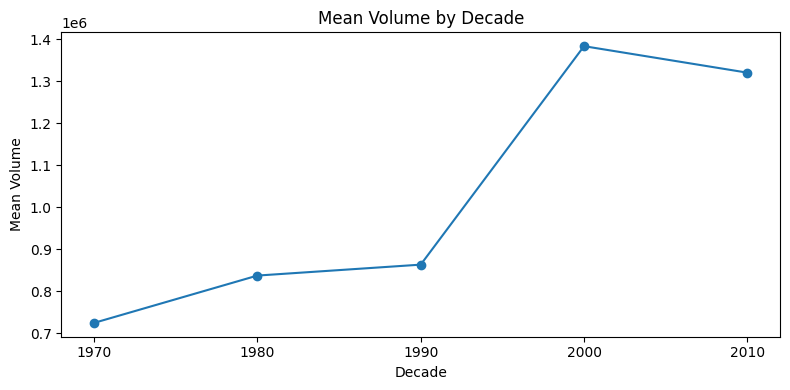

In [22]:
# LINE PLOT – MEAN CLOSE BY DECADE
plt.figure(figsize=(8, 4))
plt.plot(mean_by_decade.index, mean_by_decade['close'], marker='o')
plt.title('Mean Close Price by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Close Price')
plt.xticks(mean_by_decade.index)
plt.tight_layout()
plt.show()

# LINE PLOT – MEAN VOLUME BY DECADE
plt.figure(figsize=(8, 4))
plt.plot(mean_by_decade.index, mean_by_decade['volume'], marker='o')
plt.title('Mean Volume by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Volume')
plt.xticks(mean_by_decade.index)
plt.tight_layout()
plt.show()
